# Show the annotation of COCO format
Reference: https://towardsdatascience.com/master-the-coco-dataset-for-semantic-image-segmentation-part-1-of-2-732712631047

In [1]:
import cv2
import numpy as np
import os
import random
import skimage.io as io
from pycocotools.coco import COCO

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

/ldap_home/jincheng.lyu/miniconda3/envs/solo/lib/python3.7/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
annFile = "/ldap_home/jincheng.lyu/project/SOLO/tools/convert_datasets/instances_train.json"
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [3]:
# Define the classes (out of the 222) which you want to see. Others will not be shown.
# filterClasses = ['Air conditioner', 'Watches', 'Biscuit', 'Rope']
filterClasses = ['Rope']

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 

# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

Number of images containing all the  classes: 100


In [6]:
dataDir = "/ldap_home/jincheng.lyu/data/product_segmentation/synthetics_cocoformat/train/"

# load and display a random image
# img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img = coco.loadImgs(imgIds[8])[0]
img

{'id': 8,
 'file_name': 'c030bac2402ad95d9f735df8b0256c0f.png',
 'width': 2481,
 'height': 798,
 'date_captured': '2021-07-19 09:28:19.726889',
 'license': 1,
 'coco_url': '',
 'flickr_url': ''}

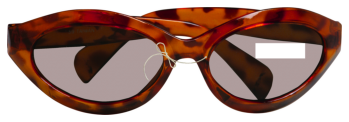

In [7]:
I = io.imread('{}/{}'.format(dataDir, img['file_name']))/255.0

plt.axis('off')
plt.imshow(I[:,:,:3])
plt.show()

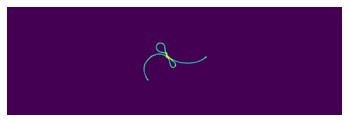

In [9]:
# Display instance mask from alpha channel
plt.axis('off')
plt.imshow(I[:,:,-1])
plt.show()

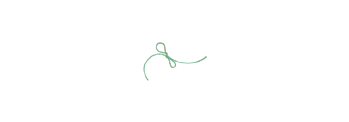

In [10]:
# Load and display instance annotations
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

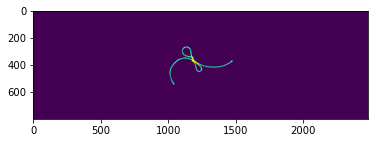

In [11]:
#### GENERATE A BINARY MASK ####
# RLE can support holes in objects
# while Polygon cannot
mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    mask = np.maximum(coco.annToMask(anns[i]), mask)
plt.imshow(mask)